In [1]:
%cd /home/q123/Desktop/explo

import torch 
import gpytorch 
import logging
import logging.config

from src.helpers import setup_experiment
from src.trainer import Trainer
from src.optimizers.gibo import GIBOptimizer
from src.optimizers.vanilla_bo import BOptimizer
from src.config import get_configs

logging.config.fileConfig('logging.conf')
# create root logger
logger = logging.getLogger()
print("hello")


/home/q123/Desktop/explo


/home/q123/miniconda3/envs/boptim/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/q123/miniconda3/envs/boptim/lib/python3.10/site-packages/gym/envs/registration.py:415: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
pybullet build time: Jun 23 2022 12:25:14


hello


In [2]:
#env_name = "CartPole-v1" ## Action kernel + State_norm looks very well for cartpole
#env_name = "Swimmer-v4" ##  State_norm stabilizes training 
env_name = "Hopper-v2"
kernel_name = "rbfstate" ## "linearstate" /"rbfstate"

env_config,likelihood_config,kernel_config,optimizer_config,trainer_config = get_configs(env_name,kernel_name)
additional_layers=[] ### can be empty or [8,7] for adding 2 layers with width 8,7 respectively

optimizer_config = {
        "n_eval":2, ## 3 for cartpole (very noisy)
        ### for GIBO
        "n_max":32, 
        "n_info_samples":16,
        "delta":0.1, ## 0.01 for cartpole
        ### hessian normalisation applies only for rbf
        "normalize_gradient": True,
        "standard_deviation_scaling":False,
}

likelihood_config = {
                "noise_hyperprior":gpytorch.priors.torch_priors.UniformPrior(a=0.01,b=0.05),
                "noise_constraint":gpytorch.constraints.constraints.Interval(0.01,0.05)
                }


kernel_config = {
        "use_ard":True,
        "kernel_name":kernel_name,
        #"lengthscale_hyperprior":gpytorch.priors.torch_priors.GammaPrior(2,0.2),
        #"lengthscale_hyperprior":gpytorch.priors.torch_priors.NormalPrior(1,0,),
        "lengthscale_constraint":gpytorch.constraints.constraints.Interval(0.1,10),
        #"outputscale_hyperprior":gpytorch.priors.torch_priors.GammaPrior(2,0.4),
        "outputscale_constraint":gpytorch.constraints.constraints.GreaterThan(0.01),
        }

trainer_config = {
        "n_steps":40, 
        "report_freq":1,
        "save_best":False,
        "wandb_logger":False,
}

model,objective_env = setup_experiment(env_config,kernel_config,likelihood_config,additional_layers)


### Chose optimizer 
#optimizer = BOptimizer(**optimizer_config)
optimizer = GIBOptimizer(model,**optimizer_config)
trainer = Trainer(model,objective_env,optimizer,**trainer_config)
rslt= trainer.run()

### ADD LR SCHEDULAR  / FIX DISCRETIZATION ===> ENJOY WEEKEND :DDD

MathLog.src.helpers : WARNING : MLP dimensions : [11, 3]
Using state normalization
MyRBF received 4851 use_ard True
 Gibo will use 32 last points to fit GP and 16 info samples
theta_i tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
MyRBF received 780 use_ard True


/home/q123/miniconda3/envs/boptim/lib/python3.10/site-packages/gpytorch/lazy/lazy_tensor.py:1741: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  Linv = torch.triangular_solve(Eye, L, upper=False).solution


acq_diff 0.11988714337348938
acq_diff 0.1099603921175003
acq_diff 0.09670820832252502
acq_diff 0.13605353236198425
acq_diff 0.09397852420806885
acq_diff 0.08780789375305176
acq_diff 0.0709066390991211
acq_diff 0.07632046937942505
acq_diff 0.048949599266052246
acq_diff 0.03609776496887207
acq_diff 0.0365675687789917
acq_diff 0.03170585632324219
acq_diff 0.02892172336578369
acq_diff 0.035480499267578125
acq_diff 0.019053339958190918
model mean constant Parameter containing:
tensor([0.2494], requires_grad=True)
inv hessian mean 8.872930526733398 gradient mean 0.12291020900011063 
theta_i tensor([[ 0.2669, -0.0218, -0.0070, -0.0179,  0.0041, -0.0295,  0.0162, -0.0677,
         -0.0194, -0.0592,  0.0146,  0.1946, -0.0368, -0.0127, -0.0283,  0.0048,
         -0.0493,  0.0045, -0.1101, -0.0311, -0.0938,  0.0115,  0.4166, -0.0458,
         -0.0180, -0.0304,  0.0044, -0.0614,  0.0608, -0.1357, -0.0442, -0.1029,
          0.0062]])
MyRBF received 174 use_ard True
acq_diff 0.5661087036132812
acq_

/home/q123/miniconda3/envs/boptim/lib/python3.10/site-packages/botorch/fit.py:155: RuntimeWarning: Fitting failed on all retries.
  warnings.warn("Fitting failed on all retries.", RuntimeWarning)


model mean constant Parameter containing:
tensor([0.7247], requires_grad=True)
inv hessian mean 8.79073429107666 gradient mean 0.005166653078049421 
current 0.4667786955833435 / max 1.9555320739746094 /batch_mean 0.4667786955833435 /batch_max 0.4667786955833435 
##############################
covar_lengthscale max 10.0                     min 0.10000000149011612                      mean6.775431156158447                     covar_outputscale 0.737937331199646                     noise 0.009999999776482582
##############################
MLL : 1.0884758234024048
grad_mean : max 8.455249786376953 /  min -0.5887863039970398
grad_covar : max 2.865081787109375 /  min 9.999999717180685e-10
theta_i tensor([[ 3.4943e+00, -3.2636e-02, -6.3154e-02, -3.7671e-02, -9.5578e-03,
         -1.5900e-01, -1.6768e+00, -2.1555e+00, -2.0649e+00, -4.0548e-01,
          1.4181e+00,  3.3496e-01, -8.3517e-02, -9.7486e-04, -7.1539e-02,
         -8.4331e-03, -2.3689e-01,  6.0852e-02, -7.6127e-01, -2.4460e-01,
    

/home/q123/miniconda3/envs/boptim/lib/python3.10/site-packages/botorch/fit.py:155: RuntimeWarning: Fitting failed on all retries.
  warnings.warn("Fitting failed on all retries.", RuntimeWarning)


model mean constant Parameter containing:
tensor([1.8170], requires_grad=True)
inv hessian mean 9.295382499694824 gradient mean 0.003788116853684187 
current 1.9618176221847534 / max 1.9671247005462646 /batch_mean 1.9618176221847534 /batch_max 1.9618176221847534 
##############################
covar_lengthscale max 10.0                     min 0.10000000149011612                      mean6.829844951629639                     covar_outputscale 2.5547869205474854                     noise 0.009999999776482582
##############################
MLL : 1.0449236631393433
grad_mean : max 14.107845306396484 /  min -1.2165617942810059
grad_covar : max 9.594395637512207 /  min 9.999999717180685e-10
theta_i tensor([[ 3.5375e+00, -3.2662e-02, -6.3015e-02, -3.7609e-02, -1.0328e-02,
         -1.6046e-01, -1.7009e+00, -2.1565e+00, -2.0641e+00, -4.0517e-01,
          1.4141e+00,  3.6862e-01, -8.6386e-02, -8.7123e-04, -7.1490e-02,
         -1.1175e-02, -2.3878e-01,  6.0346e-02, -7.6290e-01, -2.4458e-01,
 

KeyboardInterrupt: 

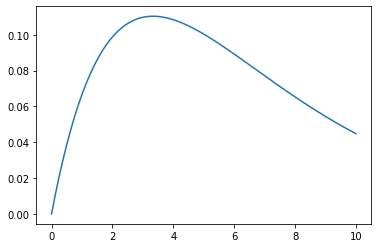

In [ ]:
import scipy.stats as stats 
import numpy as np
import matplotlib.pyplot as plt

alpha = 2
beta = 0.3
x = np.linspace (0, 10, 200) 
y1 = stats.gamma.pdf(x, a=alpha, scale=1/beta)
plt.plot(x,y1)